# Temperaturmessungen

Fast alle Temperaturesensoren sind thermoresistiv, d.h. der Widerstandswert einer Komponente ändert sich in Abhängigkeit von der Temperatur. Es gibt allerdings auch Thermoelement, die aufgrund des Seebeck-Effekts eine Spannung generieren und Wärmebildkameras, die Wärmestrahlung der Umgebung einsammeln und diese mittels Linsen auf thermoresistive Komponenten fokussieren. 

## Thermoresistive Sensoren

Widerstände ändern ihren Wert in Abhängigkeit von der Temperatur. Wie sich die Temperatur genau ändert, zeigt der Kennlinienverlauf, wie er in nachfolgendem Diagram für verschiedene thermoresistive Sensoren dargestellt ist:

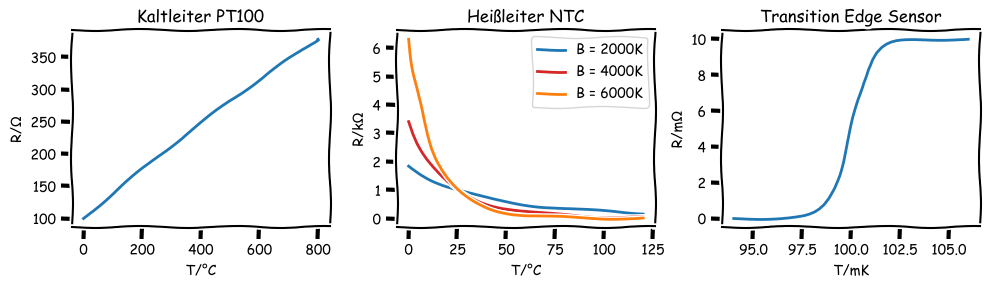

In [1]:
#Benötigte Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

# MatplotLib Settings:
plt.style.use('default') # Matplotlib Style wählen
plt.xkcd()
plt.rcParams['font.size'] = 10; # Schriftgröße

#--------- Kaltleiter PT100 -------------
T_PT = np.linspace(0, 800, num=800)
def R_PT(T_PT):
    R_0 = 100 # in Ohm
    A = 3.93e-3 # in 1/°C
    B = -5.7e-7 # in 1/^C^2
    return R_0 * (1 + A*T_PT + B * T_PT**2)

#--------- Heißleiter NTC -------------
T_NTC = np.linspace(0+273.15, 120+273.15, num=50)
def R_NTC(T_NTC, B):
    R_25 = 1000 # in Ohm
    T_25 = 25.0 + 273.15 # in Kelvin
    return R_25 * np.exp(B * (1/(T_NTC) - 1/T_25))

#--------- Transition Edge Sensor -------------
T = np.linspace(94, 106, num=50)
def R(T):
    k = 1.86 # in 1/mK
    a = 0.01 # in Ohm
    Tk = 100 # in mK
    return a / (1+ np.exp(-k * (T-Tk)))


#--------- Diagramme -------------
f, axs = plt.subplots(1,3,figsize=(10,3))

axs[0].plot(T_PT,R_PT(T_PT), color = 'tab:blue')
axs[0].set_xlabel('T/°C')
axs[0].set_ylabel(r'R/$\Omega$')
axs[0].set_title('Kaltleiter PT100')

axs[1].plot(T_NTC-273.15,R_NTC(T_NTC, 2000)/1000, label = "B = 2000K", color = 'tab:blue')
axs[1].plot(T_NTC-273.15,R_NTC(T_NTC, 4000)/1000, label = "B = 4000K", color = 'tab:red')
axs[1].plot(T_NTC-273.15,R_NTC(T_NTC, 6000)/1000, label = "B = 6000K", color = 'tab:orange')
axs[1].set_xlabel('T/°C')
axs[1].set_ylabel(r'R/k$\Omega$')
axs[1].set_title('Heißleiter NTC')
axs[1].legend()

axs[2].plot(T,R(T)*1000, color = 'tab:blue')
axs[2].set_xlabel('T/mK')
axs[2].set_ylabel(r'R/m$\Omega$')
axs[2].set_title('Transition Edge Sensor')

plt.tight_layout()
plt.show()

### Metallwiderstandsthermometer

Reine Metalle sind **Kaltleiter**. Mit steigender Temperatur nimmt der Widerstand aller Metalle zu. Das liegt daran, dass die Elektronen, die für die Leitfähigkeit zuständig sind, bei höheren Temperaturen häufiger aneinander stoßen, da deren Dynamik bzw. Schwingungen zu nehmen. Dadurch reduziert sich effektiv ihre Beweglichkeit und die Leitfähigkeit nimmt ab, bzw. der Widerstand nimmt zu. 

Platin hat beispielsweise einen Widerstandswert von R0 = R(0) = 100 Ohm bei 0 °C, daher der Name PT100. Sie können bei geeigneter Ausrüstung bis 850 °C eingesetzt werden. Sie haben eine fast lineare Kennlinie bei einer relativen Widerstandsänderung von knapp 0,4 % pro °C:

$$R(T) = R_0 \cdot (1 + AT + BT^2)$$

Folgende Parameter gelten für bestimmte Temperaturbereiche:
* 0-850°C: A= 3,9e-3/°C, B=-5,7e-7/°C$^2$
* -200-0°C: C = -4,2e-1/°C$^4$


### Heißleiter

Thermistoren mit negativen Temperaturkoeffizienten (NTC = Negative thermal coefficient , Heißleiter) weisen aufgrund des zugrundeliegenden Halbleiter-Effektes eine hohe Abhängigkeit von Fehlstellen, wie der Dotierung der Grundstoffe auf. Der Widerstandswert nimmt in Folge einer Temperaturerhöhung ab. Das liegt daran, dass sich, wie bei allen Halbleitern, die Anzahl der freien Elektronen mit steigender Temperatur erhöht und diese zur Leitfähigkeit beitragen. Der Widerstand wird also geringer. Dies erklärt auch den exponentiellen Verlauf der Kennlinie. 
**Heißleiter** sind bis etwa 150 °C einsetzbar. 
Sie weisen gegenüber Platin-Messwiderständen eine deutlich höhere Empfindlichkeit auf:

$$ R(T)=R_{25} \cdot \mathrm e^{B\left(\frac{1}{T+273}-\frac{1}{298}\right)}$$

mit R25 = 1000 Ohm und B = 3528.

Heißleiter werden häufig direkt auf Platinen verbaut.

### Silizium-Temperatursensor

Hier wird Silizium mit einem Element der 5- Hauptgruppe zu einem n-dotierten Halbleiter kombiniert. Auf einer Seite des Sensors, am Kontaktbereich, entsteht eine Raumladungszon, die sich bis zu gegenüberliegenden Metall-Fläche ausbildet. Steigt die Temperatur, so reduziert sich auch in diesem Bauteil die Beweglichkeit der Elektronen und der Widerstand nimmt zu. Im Gegensatz zu Kaltleitern ist der quadratische Anstieg jedoch stärker ausgeprägt. 

### Phasenübergangsthermometer

Ein Transition Edge Sensor (TES), bzw. auf deutsch Phasenübergangsthermometer, ist ein supraleitender Temperatursensor, der in der Lage ist, kleinste Temperaturänderungen im Bereich von wenigen 100 $\mu\mathrm K$ zu messen. Seine Umgebungstemperatur wird je nach Material auf wenige mK runtergekühlt, um das Material in einen supraleitenden Zustand (d.h. sein Widerstand verschwindet) zu bringen. Dies ist die sogenannte kritische Temperatur, $T_c$, aber der Materiale supraleitende Eigenschaften aufweisen. Die Widerstand wird über Anlegen einer Stromstärke minimal aufgeheizt, sodass sein Arbeitspunkt in den Übergang (die steile Flanke) geschoben wird. An diesem Punkt ist die Ableitung, und somit die Empfindlichkeit, maximal. 

$$ R(T)= \frac{a}{1 + \mathrm e^{-k(T-T_c)}} $$

mit z.B. $k$ = 1.86/mK, $a$ = 0.224 Ohm und $T_c$ = 103.2 mK

## Thermoelemente

Für sehr hohe Temperaturen eignen sich thermoresistive Sensoren nur bedingt. Ab mehreren 100°C verwendet man robustere Sensoren, wie beispielsweise Thermoelemente. Diese bestehen aus zwei Drähten unterschiedlicher Materialien, also z.B. Metall A und Metall B. Diese Metalle werden an einem Punkt miteinander kontaktiert, z.B. durch Schweißen oder Vertwisten. 

In Abhängigkeit von der Umgebungstemperatur erzeugen Thermoelemente eine kleine Messspannung, die verstärkt über einen Spannungsmesseingang abgegriffen wird. Hierbei ist es sinnvoll, das Thermoelement mit identischen Drähten / Kabeln an den Spannungsmesseingang anzuschließen, also aus den Materialien A und B, damit diese die gleichen thermoelektrischen Eigenschaften aufweisen. 

Die Messspannung wird durch den **Seebeck-Effekt** erzeugt: An der Kontaktstelle zweier unterschiedlicher **leitfähiger** Materialien wird in Abhängigkeit von der zu messenden **Temperatur $T_M$** eine **Thermospannung $U$** erzeugt. 

$$U_\mathrm{thermo} = k_{A,B} \cdot T_M$$

Je nach Materialien kann die Empfindlichkeit angepasst werden. Da das Thermoelement häufig über Anschlusskabel mit dem Spannungsmesseingang verbunden wird, kann die Thermospannung nicht direkt gemessen werden. Es werden die Thermospannungen an den jeweiligen Messeingangskontakten mitgemessen:

$$U = U_1 + U_\mathrm{thermo} + U_2 = k_{1,A}\cdot T_R + k_{A,B} \cdot T_M + k_{B,2} \cdot T_R$$

$T_R$ ist hierbei die Referenz-Temperatur, oder Vergleichsstellentemperatur. D.h. die Temperaturmessung an den Kontaktstellen zum Spannungsmesseingang wird mitgemessen. Handelt es sich um Kupferkabel, so können wir schreiben:

$$U = k_{Cu,A}\cdot T_R + k_{A,B} \cdot T_M + k_{B,Cu} \cdot T_R$$

wobei $k_{Cu,A}$ die Empfindlichkeit des zwangsläufig generierten Thermoelementes ist, welches an der Kontaktstelle zur Kupferleitung entsteht. Es kann hergeleitet werden, dass sich beliebige Faktoren $k_{x,y}$ auch als Differenz von zwei einzelnen Koeffizienten schreiben lassen, wenn diese über ein gemeinsames, drittes Material miteinander verbunden sind. Praktikisch benutzt man häufig Platin (Pt) und man kann schreiben:

$$k_{x,y} = k_{x,Pt} - k_{y,Pt}$$

Weiterhin gilt natürlich $k_{x,y} = - k_{y,x}$

Mit diesen beiden Formeln können wir die obige Gleichung für die Spannung weiter umformen:

\begin{align}
U &= k_{Cu,A}\cdot T_R + k_{AB} \cdot T_M + k_{B,Cu} \cdot T_R\\
&= (k_{Cu,Pt} - k_{A,Pt})\cdot T_R + (k_{A,Pt} - k_{B,Pt})\cdot T_M + (k_{B,Pt} - k_{Cu,Pt})\cdot T_R\\
&= k_{A,B} \cdot (T_M - T_R)
\end{align}

Damit konnten wir das Leitermaterial Kupfer (Cu) aus der Gleichung eliminieren und die Spannung hängt nur noch von den verwendeten Materialien A und B im Thermoelement ab. Lediglich die Temperatur an der Kontaktstelle, $T_R$, muss noch bestimmt werden, um den Messwert der Temperaturmessung, $T_M$, zu erhalten. Diese Vergleichsstellen-Temperatur wird typischerweise mit einem thermoresistiven Sensore gemessen. Viele Messeingänge für Thermoelemente beinhalten bereits diese Option, wo die Temperatursensoren dann mittels einer Brückenschaltung direkt ausgelesen werden. 

Die häufigsten Materialien für Thermoelemente sind NiCr-Ni, Fe-CuNi und PtRh-Pt. 
Die Kennlinie eines Thermoelements ist linear, wie der Gleichung zu entnehmen ist, und hat   recht kleine Empfindlichkeiten von etwa $40\,\mathrm{\muV/^\circ C}$. Daher eignen sie sich eher weniger für die Messung von niedrigeren Temperaturen. 

Speziell in der MEMS-Technologie werden mitunter Reihenschaltungen von solchen Thermoelementen realisiert. Diese sind auch bekannt unter dem Namen **Thermopile**. In der Reihenschaltung addieren sich die Spannungen und man erhält eine höhere Empfindlichkeit. Bei MEMS-Systemen werden tausende solcher Elemente hintereinander geschaltet. Diese Systeme eignen sich auch dazu kleinste Mengen von Energie z.B. aus Umgebungs- oder Abgaswärme zurückzugewinnen.

## Pyrometer

Bei den bis genannten Temperaturmessungen müssen Widerstand oder Thermoelement immer in Wärmekontakt mit dem Objekt gebracht werden. Dies ist nicht immer möglich und es bieten sich berührungslose Temperaturmessungen an, die nach dem pyrometrischen Prinzip funktionieren. Die Grundidee ist, dass man hierbei die Strahlung eines Körpers einsammelt, die er entsprechend des Planck'schen Strahlungsgesetztes emittiert. Man benötigt entsprechende Optik, eine Linse, um die Strahlung möglichst gut zu fokussieren. In die Brennweite der Optik wird dann ein normaler Temperatursensor (Widerstand oder Thermoelement) eingesetzt, der die von der Strahlung umgesetzte Wärme misst. 

Das **Planck'sche Strahlungsgesetz** besagt, dass jeder Körper, der eine von Null Kelvin verschiedene Temperatur hat, eine bestimmte Strahlung aussendet. 

$$M_\lambda(T) = \frac{2 \pi h c^2}{\lambda^5}\frac{1}{\mathrm e^{\frac{hc}{kT}}-1}$$

wobei $h = 6,626 \cdot 10^{-34}\,\mathrm{Js}$ das Planck'sche wirkungsquantum ist, $k = 1,80649 \cdot 10^{-23}\,\mathrm{J/K}$ die Boltzmann-Konstante, $\lambda$ die Wellenlänge des ausgesandten Lichts und $c = 299792458\,\mathrm{m/s}$ die Lichtgeschwindigkeit. 

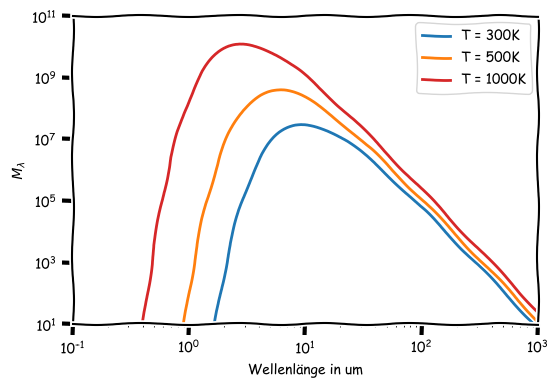

In [2]:
#Benötigte Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

# MatplotLib Settings:
plt.style.use('default') # Matplotlib Style wählen
plt.xkcd()
plt.rcParams['font.size'] = 10; # Schriftgröße
plt.figure(figsize=(6,4)) # Plot-Größe


#--------- Kaltleiter PT100 -------------
wl = np.linspace(0.1e-6, 1000e-6, num=10000)
def M(wl,T):
    h = 6.626e-34 #Js
    c = 299792458 #m/s
    k = 1.380649e-23 #J/K
    return 2*np.pi * h * c**2 / wl**5 / (np.exp(h*c/(wl*k*T))-1)

plt.loglog(wl*1e6, M(wl,300), label = "T = 300K", color = 'tab:blue')
plt.loglog(wl*1e6, M(wl,500), label = "T = 500K", color = 'tab:orange')
plt.loglog(wl*1e6, M(wl,1000), label = "T = 1000K", color = 'tab:red')

plt.xlim(0.1,1000)
plt.ylim(1e1,1e11)
plt.xlabel('Wellenlänge in um')
plt.ylabel('$M_\lambda$')
plt.legend()
plt.show()

In Abhängigkeit von der Temperatur des Körpers ändert sich einerseits die Intensität der Strahlung, aber auch die Wellenlänge der ausgesandten Strahlung. Diese beiden Größen, oder eine Kombination daraus, wird für berührungslose Temperaturmessungen benutzt. Der Wellenlängenbereich erstreckt sich hierbei über den gesamten Spektralbereich von kurzwelliger Röntgenstrahlung - UV-Strahlung - sichtbarer Vereich und bis hin in den Infrarot-Bereich. Bei noch größeren Wellenlängen würden wir die Funkwellen finden. 
Über dieses Spektrum kann man nun integrieren, um die spezifische Ausstrahlung eines schwarzen Körpers zu bestimmen, was das **Stefan-Boltzmann-Gesetz** liefert: 

$$M = \int_0^\infty M_\lambda(\lambda) d\lambda = \sigma T^4$$ 

wobei $\sigma = 5,67\cdot 10^{-8}\,\mathrm{W/(m^2 K^4)}$ die Stefan-Boltzmann-Konstante ist.

Um die Strahlung möglichst gut einzusammeln werden spezielle Linsen benötigt. Pyrometer verwenden häufig optische Linsen, die Strahlung im sichtbaren und Nah-infraroten Bereich gut fokussieren und transmittieren. Doch diese Transmissivität endet bei einer Wellenlänge von etwa 4 Mikrometern. Hier müssen Silizium-Wafer zum Einsetz kommen, die je nach Beschichtung Wellenlängen bis zu 20 Mikrometern bündeln. Mittels Pyrometern kann also nur ein Bruchteil des Strahlungsspektrums gemessen werden. 

### Fehlerquellen

Die Hersteller kalibrieren ihre Systeme und liefern die Kennlinie mit. Einen Einflusseffekt den sie jedoch nicht weg-kalibrieren können ist die Emissivität von Strahlung verschiedener Körper und unterschiedlicher Materialien. Reale Körper sind nämliche keine perfekten Schwarzen Körper, die ein perfektes Planck-Spektrum aussenden. In Abhängigkeit vom Material und auch der Beschaffenheit der Oberfläche emittieren sie nur einen Bruchteil, was durch den **Emissionsfaktor $\varepsilon$** beschrieben wird:

$$M_\mathrm{real} = \epsilon \cdot M$$

Dieser Faktor ist eine Zahl zwischen 0 und 1, wobei 1 ein perfekter Schwarzer Strahler wäre. 
Typische Werte für bestimmte Materialien sind beispielsweise:

* polierter Stahl: 7%
* verrosteter Stahl: 85%
* Chrom: 30%
* Glas: 94%

Diese Parameter hängen jedoch wiederuum von der Temperatur und der Wellenlänge ab, weshalb sie nicht einfach pauschalisiert werden können. Kalibriermessungen an konkreten Oberflächen und Materialien ist daher notwenedig. 

## Wärmebildkamera

Allgemein kann man jede Art von Sensor auch in Bildbasierte Messinstrumente einsetzen. Ein bekanntes Beispiel hierfür sind Wärmebildkameras. Diese bestehen dann im Gegensatz zum Pyrometer nicht mehr aus nur einem Temperatursensor, sondern aus einem ganzen Array. Je nach Sensortyp können hier auch wieder unterschiedliche Temperatur- und Wellenlängenbereiche gemessen werden und so kontaktlos über die Bestrahlungsstärkemessung Messungen vornehmen. Jeder Sensor entspricht am Ende einem Pixel im Bild, auf dem die generierte Erwärmung gemessen wird. Dies nennent man auch **Bolometerprinzip**. 

Bei Wärmebildkameras benutzt man häufig spezielle Materialien als Absorber, die die Infrarotstrahlung möglichst gut aufnehmen, z.B. eine Membran aus Vanadiumoxid. Der Widerstand der Membran ändert sich nun bei der Erwärmung. Die Membran nimmt jedoch nur einen Bruchteil der Strahlung auf, die restliche Strahlung wird transmittiert. Um diesen Verlust zu kompensieren, wird ein Reflektor hinter der Membran installiert, der die Strahlung zurückwirft. Der Abstand zwischen Reflektor und Membran ist so gewählt, dass sie genau 1/4 der Wellenlänge entspricht und somit als *Resonator* dient, der die Absorption maximiert. 

Auch bei Wärmebildkameras gibt es die bei Pyrometern diskutierten Fehlerquellen der Abhängigkeit der Temperaturmessung vom Material und der Oberflächenbeschaffenheit. Häufig interessiert einem allerdings bei bildbasierten Verfahren eher due großglächige Temperaturverteilung und nicht so sehr der ganz präzise Temperaturmesswert an einer konkreten Stelle. D.h. relative räumliche und zeitliche Temperatur-Variationen können mit Wärmebildkameras sehr gut erfasst, wohingegen absolute Messungen stärker fehlerbehaftet sind. 